# Linear Regression Example

In [1]:
# import sys
# sys.path.append('../../pyLearnAlgorithms')
import pandas as pd
import numpy as np
import os
from pyLearnAlgorithms.graph_view import GraphView
from pyLearnAlgorithms.linear_regression import LinearRegression
from pyLearnAlgorithms.split_data import SplitData

In [2]:
dr = '../datasets'
fl = 'HealthInsurance.csv'
csv_path = os.path.join(dr, fl)
data = pd.read_csv(csv_path)

In [3]:
split = SplitData(data)
data_train, data_test, data_val = split.split_train_test_val(test_ratio = 0.2, 
                                                             val_ratio = 0.2)
print('Size train:', data_train.size)
print('Size teste:', data_test.size)
print('Size val:', data_val.size)

Size train: 12
Size teste: 4
Size val: 4


In [4]:
data_train = np.array(data_train)
data_test = np.array(data_test)
data_val = np.array(data_val)
X, y = np.atleast_2d(data_train[:, 0]).T, data_train[:, 1]
Xtest, ytest = np.atleast_2d(data_test[:, 0]).T, data_test[:, 1]
Xval, yval = np.atleast_2d(data_val[:, 0]).T, data_val[:, 1]

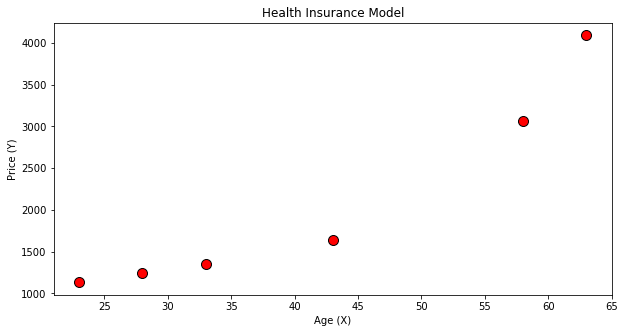

In [5]:
dataset_graph = GraphView(X, y)
dataset_graph.view_data(xlabel = 'Age (X)', ylabel = 'Price (Y)', 
                        title = 'Health Insurance Model')

In [6]:
regressor = LinearRegression(X, y)
optimize_values = regressor.train_linear_reg()
print('Cost Function:', optimize_values.fun)
print('Theta parameters:', optimize_values.x)

Cost Function: 60745.22189626631
Theta parameters: [-819.83890603   70.33472583]


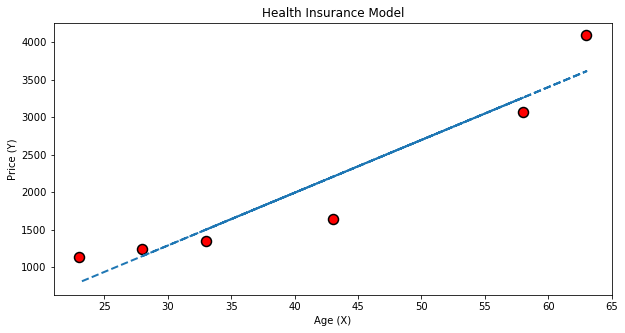

In [7]:
dataset_graph.model_linear(xlabel = 'Age (X)', ylabel = 'Price (Y)', 
                           title = 'Health Insurance Model')

In [8]:
train_error, val_error = regressor.learning_curve(Xval, yval)
print('Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

Training Examples	Training Error		Cross Validation Error
1			0.0	2674.0489545799715
2			62.23015911853654	98274.1348796998
3			75040.98590175071	135084.91405928318
4			56287.01934451546	135276.6693389872
5			53610.47328131	86757.93695172475
6			60745.22189626631	96924.2200442737


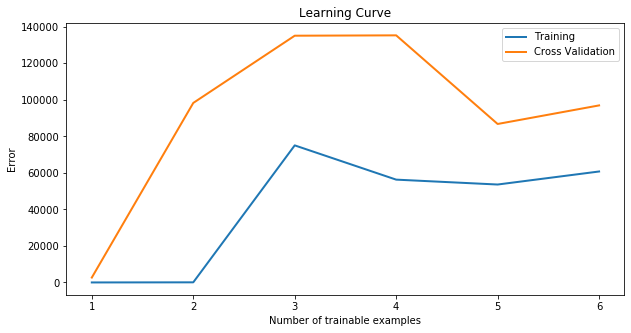

In [9]:
dataset_graph.learning_curve(train_error, val_error)

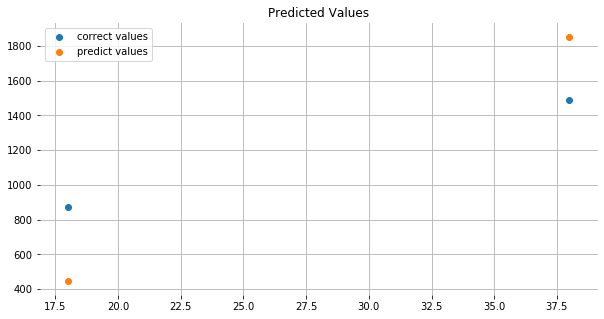

In [10]:
pred = regressor.predict(Xtest)
dataset_graph.predicted_values(Xtest, ytest, pred)

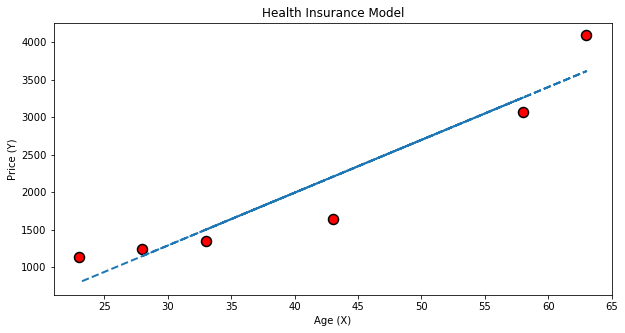

In [11]:
dataset_graph.model_linear_normal_equation(xlabel = 'Age (X)', ylabel = 'Price (Y)', 
                                           title = 'Health Insurance Model')

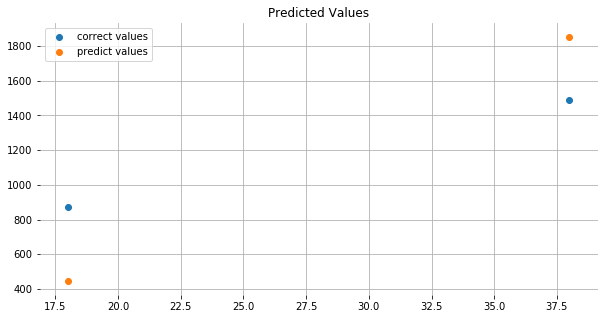

In [12]:
pred_NE = regressor.predict_normal_equation(Xtest)
dataset_graph.predicted_values(Xtest, ytest, pred_NE)